**Problem Statement:** Build a model to detect fraudulent credit card transactions. Use a dataset
containing information about credit card transactions, and experiment with
algorithms like Logistic Regression, Decision Trees, or Random Forests to classify
transactions as fraudulent or legitimate.

In [1]:
# Import necessary libraries
import pandas as pd

**DATA EXPLORATION**

In [2]:
# Load the dataset
train_data = pd.read_csv('fraudTrain.csv')

# Display the first few rows of the dataset to understand its structure
print("Training Data:")
train_data.head()

Training Data:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [3]:
# Dropping the unnecessary columns
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0


In [4]:
# Checking the missing values
train_data.isnull().sum()

merchant      0
category      0
amt           0
gender        1
lat           1
long          1
city_pop      1
job           1
unix_time     1
merch_lat     1
merch_long    1
is_fraud      1
dtype: int64

We can Observe clearly its contain 1 missing values in various columns.

In [5]:
# Impute missing values with mode
train_data['gender'].fillna(train_data['gender'].mode()[0], inplace=True)
train_data['lat'].fillna(train_data['lat'].mode()[0], inplace=True)
train_data['long'].fillna(train_data['long'].mode()[0], inplace=True)
train_data['city_pop'].fillna(train_data['city_pop'].mode()[0], inplace=True)
train_data['job'].fillna(train_data['job'].mode()[0], inplace=True)
train_data['unix_time'].fillna(train_data['unix_time'].mode()[0], inplace=True)
train_data['merch_lat'].fillna(train_data['merch_lat'].mode()[0], inplace=True)
train_data['merch_long'].fillna(train_data['merch_long'].mode()[0], inplace=True)
train_data['is_fraud'].fillna(train_data['is_fraud'].mode()[0], inplace=True)

In [6]:
# Checking the missing values after mode imputation
train_data.isnull().sum()

merchant      0
category      0
amt           0
gender        0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [7]:
# Checking the duplicate value
train_data.duplicated().sum()

0

No duplicate value present.

In [8]:
# Transforming the categorical columns into numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [9]:
train_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495.0,354,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149.0,409,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154.0,293,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939.0,314,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99.0,110,1.325376e+09,38.674999,-78.632459,0.0


**Visualization**

Text(0.5, 1.0, ' Distribution of Target Variable (is_fraud)')

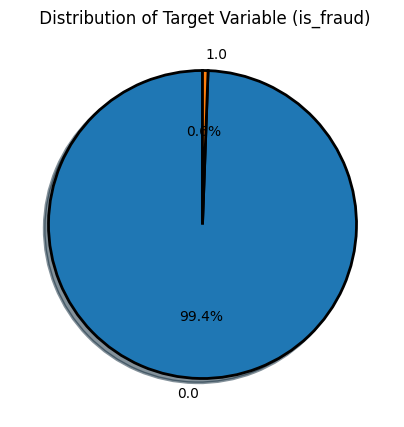

In [10]:
# Visualization of traget Variable
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
wp = {'linewidth':2, 'edgecolor':"black"}
tags = train_data['is_fraud'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops = wp, label='')
plt.title(' Distribution of Target Variable (is_fraud)')

We can observe that 99.4% 0 means Legitimate and 0.6% 1 means fraudanet present in traing dataset so its shows our target variable is highly imbalanced.

**Feature Selection & Feature Engineering**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import joblib
from joblib import dump, load

In [12]:
# Separate features and target variable for training data
X = train_data.drop('is_fraud', axis=1)
y = train_data['is_fraud']

**Handling Imbalanced target Variable Using Under Sampling**

In [13]:
from imblearn.under_sampling import RandomUnderSampler
# Apply random undersampling to balance the classes in the training data
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

Text(0.5, 1.0, 'After resampling: Distribution of target variable(is_fraud)')

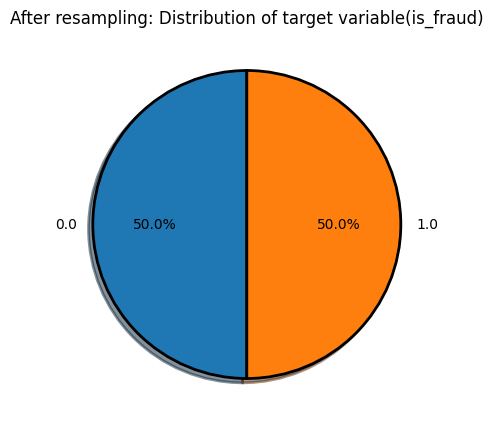

In [14]:
# Visualization of resampled traget Variable
fig = plt.figure(figsize=(5,5))
wp = {'linewidth':2, 'edgecolor':"black"}
tags = y_resampled.value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops = wp, label='')
plt.title('After resampling: Distribution of target variable(is_fraud)')

After undersampling we can see our target variable is balanced.

**Train-Test Split**

In [15]:
#Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Model Development Using Hyperparameter & Cross Validation**

In [16]:
#Define Machine Learning Models
models = {
      'Logistic Regression' :LogisticRegression(),
      'Random Forest': RandomForestClassifier()
}

In [17]:
#Define Hyperparameter using GridSearchCV
hyperparameters = {
    'Logistic Regression' : {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

In [18]:
#define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
# Create an empty list to store results
results_list = []

# Variables to track the best model and its accuracy
best_model_name = None
best_val_accuracy = 0.0
min_accuracy_difference = float('inf')  # Initialize with a large value

# Train and Evaluate Models
for models_name, model in models.items():
    print(f"\nTraining and evaluating {models_name}...")

    # Apply Hyperparameter tuning & cross-validation
    grid_search = GridSearchCV(model, hyperparameters[models_name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {models_name}: {best_params}")

    # Updated model with best hyperparameters
    best_model = grid_search.best_estimator_

    # Training Accuracy
    train_predictions = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f"{models_name} Training Accuracy: {train_accuracy:.3f}")

    # Validation Accuracy
    val_predictions = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"{models_name} Validation Accuracy: {val_accuracy:.3f}")

    # Display classification report for the Val set
    print(f"Classification Report for {models_name} (Validation Set):")
    print(classification_report(y_val, val_predictions))

    # Calculate the absolute difference between training and Validation accuracy
    accuracy_difference = abs(train_accuracy - val_accuracy)

    # Save the model with the least difference between training and Validation accuracy
    if accuracy_difference < min_accuracy_difference:
        min_accuracy_difference = accuracy_difference
        best_model_name = models_name
        best_val_accuracy = val_accuracy

    # Append results to the list
    results_list.append({
        'Model Name': models_name,
        'Training Accuracy': train_accuracy,
        'Validation Accuracy': val_accuracy,
        'Accuracy Difference': accuracy_difference,
        'Best Hyperparameters': best_params,
        'Model': best_model
    })


Training and evaluating Logistic Regression...
Best Hyperparameters for Logistic Regression: {'C': 0.001}
Logistic Regression Training Accuracy: 0.542
Logistic Regression Validation Accuracy: 0.333
Classification Report for Logistic Regression (Validation Set):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.33      1.00      0.50         6

    accuracy                           0.33        18
   macro avg       0.17      0.50      0.25        18
weighted avg       0.11      0.33      0.17        18


Training and evaluating Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Random Forest Training Accuracy: 1.000
Random Forest Validation Accuracy: 1.000
Classification Report for Random Forest (Validation Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [20]:
# Convert the list to a DataFrame
results_df = pd.DataFrame(results_list)

# Sort the DataFrame by training & Validation accuracy in descending order
results_df_sorted = results_df.sort_values(by=['Training Accuracy', 'Validation Accuracy'], ascending=False)

# Display the Model comparison matrix
print("Model Comparison Matrix:")
results_df_sorted

Model Comparison Matrix:


,Model Name,Training Accuracy,Validation Accuracy,Accuracy Difference,Best Hyperparameters,Model
1,Random Forest,1.000000,1.000000,0.000000,"{'max_depth': None, 'n_estimators': 50}","(DecisionTreeClassifier(max_features='sqrt', r..."
0,Logistic Regression,0.541667,0.333333,0.208333,{'C': 0.001},LogisticRegression(C=0.001)


**Saving the Best Model based on high accuracy & accuracy difference between training and validation acuuracy.**

In [21]:
# Save the best model based on the least difference between training and test accuracy
best_model = results_df.loc[results_df['Model Name'] == best_model_name, 'Model'].values[0]
best_model_path = f'{best_model_name}_best_model.pkl'
joblib.dump(best_model, best_model_path)
print(f"\nBest Model ({best_model_name}) saved successfully at: {best_model_path}")


Best Model (Random Forest) saved successfully at: Random Forest_best_model.pkl


**Model Validation on Test Dataset**

In [22]:
# Load the best model
loaded_best_model = joblib.load(best_model_path)
# Print a message indicating which model has been loaded
print(f"\nBest Model loaded successfully from: {best_model_path}")


Best Model loaded successfully from: Random Forest_best_model.pkl


In [28]:
# Load the test dataset
test_data = pd.read_csv('fraudTest.csv')

# Display the first 5 rows of the test dataset to understand its structure
print("Testing Data:")
test_data.head()

Testing Data:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [29]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302.0,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496.0,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0


In [30]:
test_data.isnull().sum()

merchant      0
category      0
amt           0
gender        0
lat           1
long          1
city_pop      1
job           1
unix_time     1
merch_lat     1
merch_long    1
is_fraud      1
dtype: int64

In [32]:
# Impute missing values with mode
test_data['lat'].fillna(test_data['lat'].mode()[0], inplace=True)
test_data['long'].fillna(test_data['long'].mode()[0], inplace=True)
test_data['city_pop'].fillna(test_data['city_pop'].mode()[0], inplace=True)
test_data['job'].fillna(test_data['job'].mode()[0], inplace=True)
test_data['unix_time'].fillna(test_data['unix_time'].mode()[0], inplace=True)
test_data['merch_lat'].fillna(test_data['merch_lat'].mode()[0], inplace=True)
test_data['merch_long'].fillna(test_data['merch_long'].mode()[0], inplace=True)
test_data['is_fraud'].fillna(test_data['is_fraud'].mode()[0], inplace=True)

In [33]:
test_data.isnull().sum()

merchant      0
category      0
amt           0
gender        0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [34]:
# Separate features from the 'is_fraud' target column
X_test = test_data.drop('is_fraud', axis=1)

In [35]:
# Identify categorical columns
categorical_columns = X_test.select_dtypes(include=['object']).columns.tolist()


In [36]:
# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
X_test[categorical_columns] = X_test[categorical_columns].apply(label_encoder.fit_transform)


In [37]:
test_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302.0,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496.0,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0


In [38]:
from sklearn.preprocessing import StandardScaler
# Standardize the features in the test dataset
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [39]:
# Make predictions on the test dataset
test_predictions = loaded_best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Add predicted labels to the test dataset
test_data['is_fraud_prediction'] = test_predictions

In [41]:
# Convert 0s and 1s to 'legitimate' and 'fraudulent'
test_data['is_fraud_prediction'] = test_data['is_fraud_prediction'].map({0: 'legitimate', 1: 'fraudulent'})


In [42]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,is_fraud_prediction
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0,legitimate
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302.0,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0,legitimate
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496.0,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0,legitimate
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0,legitimate
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27230,"fraud_Streich, Hansen and Veum",gas_transport,73.12,F,42.9207,-91.0685,878.0,Risk analyst,1.372580e+09,43.410199,-90.119977,0.0,legitimate
27231,fraud_Towne LLC,misc_pos,3.69,F,36.7558,-83.1838,581.0,"Psychologist, counselling",1.372580e+09,36.418842,-83.067039,0.0,legitimate
27232,fraud_Padberg-Welch,grocery_pos,84.05,F,26.3304,-81.5871,276002.0,Medical technical officer,1.372581e+09,25.873441,-81.589103,0.0,legitimate
27233,"fraud_Mosciski, Gislason and Mertz",grocery_pos,74.56,M,29.8872,-90.0331,55581.0,Biomedical scientist,1.372581e+09,30.430342,-90.735797,0.0,legitimate


Text(0.5, 1.0, ' Distribution of Predicted Variable(is_fraud_prediction)')

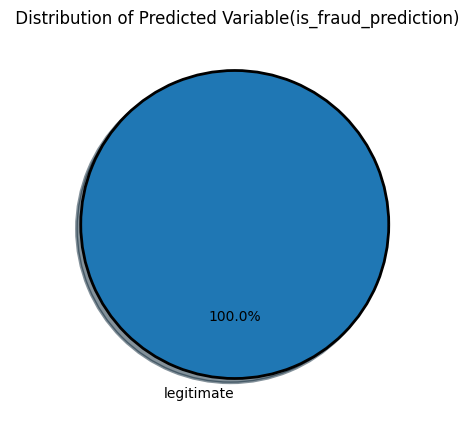

In [43]:
fig = plt.figure(figsize=(5,5))
wp = {'linewidth':2, 'edgecolor':"black"}
tags = test_data['is_fraud_prediction'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops = wp, label='')
plt.title(' Distribution of Predicted Variable(is_fraud_prediction)')